                                                    #SUPER MARKET SALES ANALYSIS

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# visualization
import seaborn as sns
# Importing the dataset
dataset = pd.read_csv('C:\\Users\\Gourav\\Downloads\\sales.csv')
# Check the data types of the columns
print(dataset.info())

# Get a summary of statistics for numeric columns
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB
None
           sale_id   unit_price     quantity          tax  total_price  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000  

#Check for missing and values

In [2]:
# Check for missing values
print(dataset.isnull().sum())

# Check forCheck for missing values
print(dataset.duplicated().sum())

sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64
0


#Highest and lowest number of members in city

City with the highest number of members:
Chicago with 178 members

City with the lowest number of members:
Los Angeles with 161 members

Member count by city:
 city
Chicago        178
New York       177
Los Angeles    161
Name: count, dtype: int64


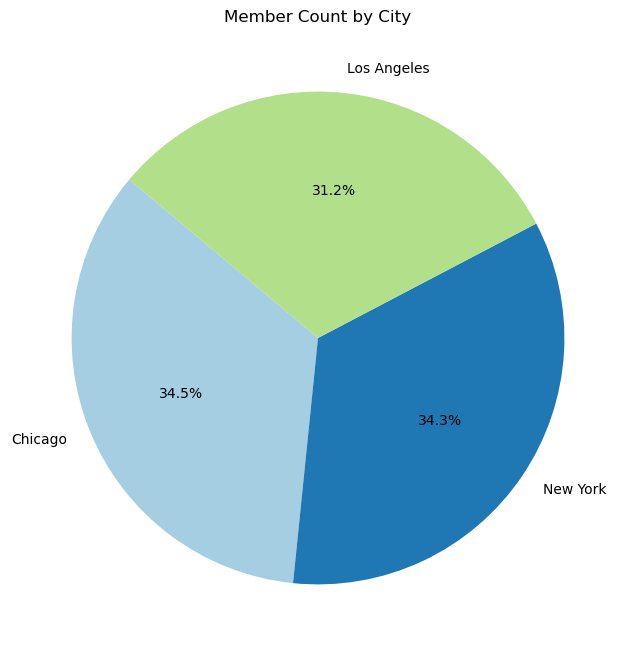

In [3]:

# Assuming 'dataset' is your loaded DataFrame
member_dataset = dataset[dataset['customer_type'] == 'Member']

# Group by city and count the number of members
city_member_count = member_dataset['city'].value_counts()

# Find the cities with the highest and lowest member counts
highest_city = city_member_count.idxmax()
highest_count = city_member_count.max()
lowest_city = city_member_count.idxmin()
lowest_count = city_member_count.min()

# Print results
print("City with the highest number of members:")
print(f"{highest_city} with {highest_count} members\n")

print("City with the lowest number of members:")
print(f"{lowest_city} with {lowest_count} members\n")

print("Member count by city:\n", city_member_count)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_member_count, labels=city_member_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Member Count by City")
plt.show()

 #Summary by Product Category

Statistics Summary by Product Category:
                 quantity                  total_price                  
                      sum       mean count         sum        mean count
product_category                                                        
Beverages            1952  10.438503   187    22983.32  122.905455   187
Fruits               2286  10.937799   209    26197.45  125.346651   209
Household            1908   9.636364   198    21615.84  109.170909   198
Personal Care        2278  10.951923   208    27050.18  130.048942   208
Stationery           1913   9.661616   198    20737.11  104.732879   198


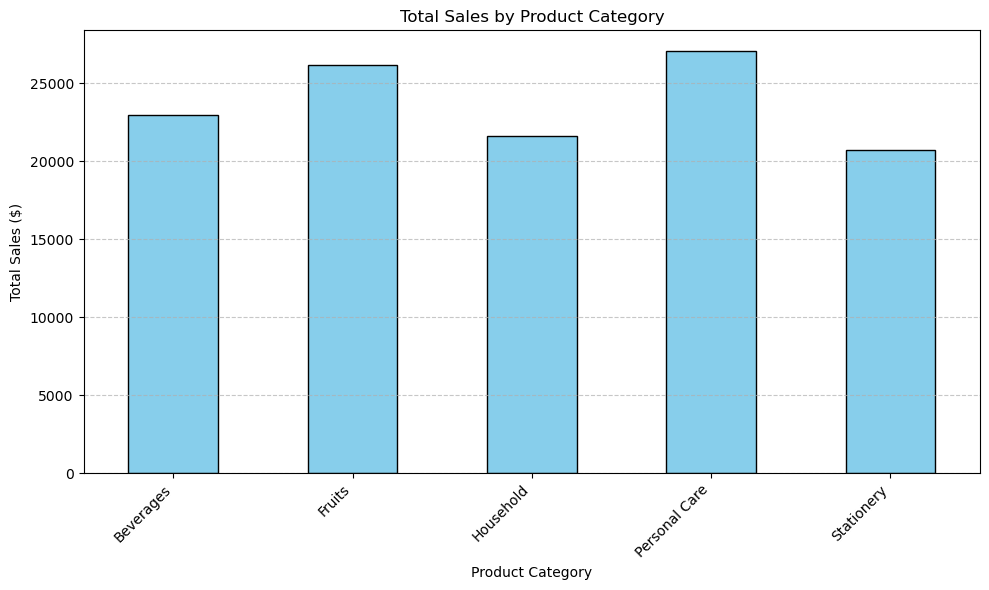

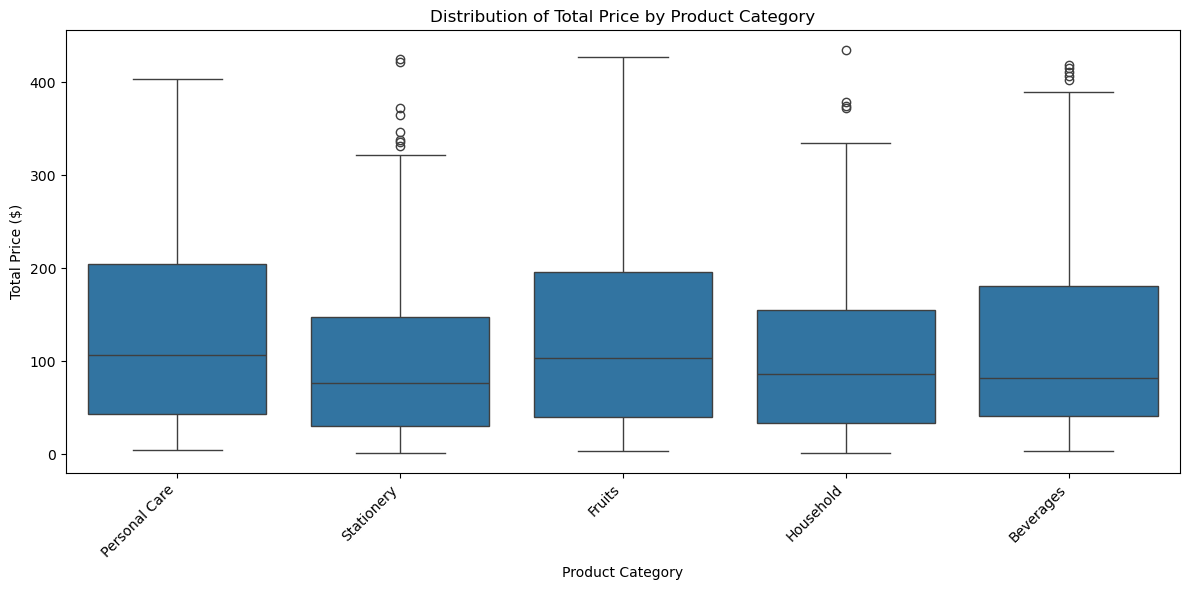

In [6]:
# Group by product_category and calculate statistics
category_stats = dataset.groupby('product_category')[['quantity', 'total_price']].agg(['sum', 'mean', 'count'])

# Display statistics summary
print("Statistics Summary by Product Category:")
print(category_stats)

# Bar chart: Total Sales per Product Category
plt.figure(figsize=(10, 6))
total_sales = dataset.groupby('product_category')['total_price'].sum()
total_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Boxplot: Distribution of Total Price by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='total_price', data=dataset)
plt.title('Distribution of Total Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
#TOTAL SALES OF PRODUCT QUANTITY

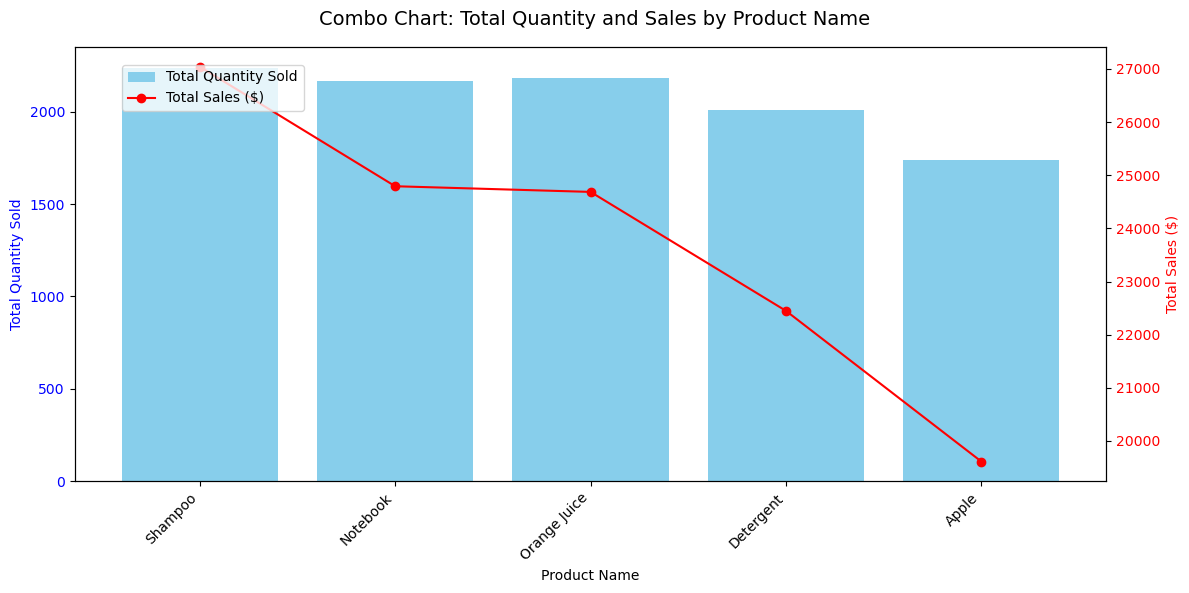

Product Statistics (Total Quantity and Total Sales):
               quantity  total_price
product_name                       
Shampoo           2238     27041.36
Notebook          2165     24792.98
Orange Juice      2183     24686.46
Detergent         2010     22449.07
Apple             1741     19614.03


In [7]:
# Group by product_name and calculate total sales and total quantity
product_stats = dataset.groupby('product_name')[['quantity', 'total_price']].sum()

# Sort the products for better visualization
product_stats = product_stats.sort_values(by='total_price', ascending=False)

# Create a combo chart (bar + line)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total quantity
ax1.bar(product_stats.index, product_stats['quantity'], color='skyblue', label='Total Quantity Sold')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Total Quantity Sold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right')

# Line chart for total sales
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(product_stats.index, product_stats['total_price'], color='red', marker='o', label='Total Sales ($)')
ax2.set_ylabel('Total Sales ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
fig.suptitle('Combo Chart: Total Quantity and Sales by Product Name', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Display summarized data
print("Product Statistics (Total Quantity and Total Sales):\n", product_stats)

In [17]:
#HIGHEST TEX COLLECT  PRODUCT

Top 5 Products with the Highest Tax:
product_name
Shampoo         1769.11
Notebook        1621.98
Orange Juice    1615.04
Detergent       1468.72
Apple           1283.16
Name: tax, dtype: float64


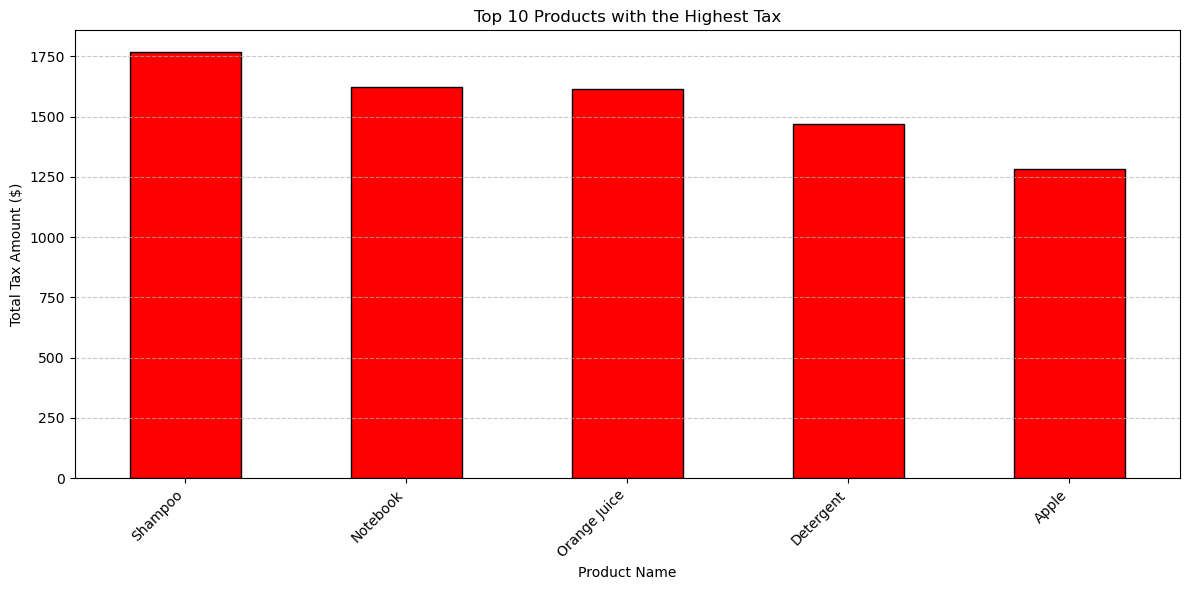

In [9]:

# Group by product_name and calculate the total tax
product_tax = dataset.groupby('product_name')['tax'].sum()

# Sort products by total tax in descending order
product_tax = product_tax.sort_values(ascending=False)

# Display the top 5 products with the highest tax
print("Top 5 Products with the Highest Tax:")
print(product_tax.head())

# Plot a bar chart for the top 10 products with the highest tax
plt.figure(figsize=(12, 6))
product_tax.head(10).plot(kind='bar', color='red', edgecolor='black')

# Add titles and labels
plt.title('Top 10 Products with the Highest Tax')
plt.xlabel('Product Name')
plt.ylabel('Total Tax Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

In [ ]:
GENDER SHOPING STATUS

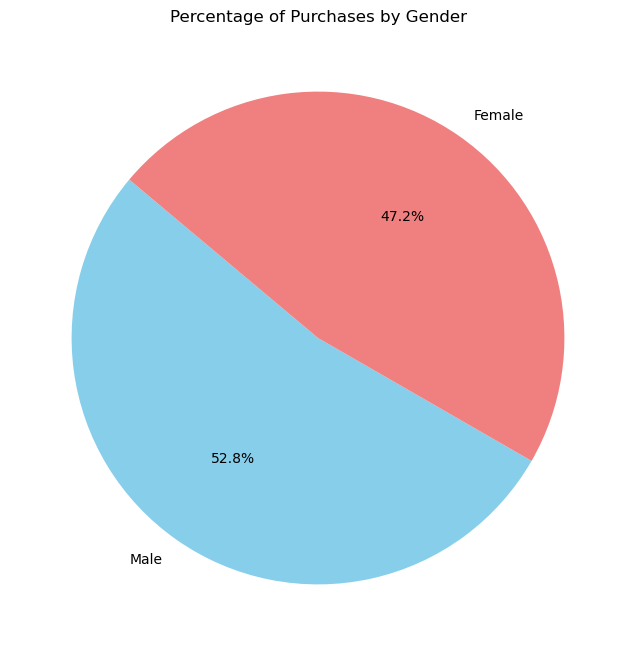

Total Purchases by Gender:
 gender
Male      528
Female    472
Name: count, dtype: int64


In [10]:
# Group by gender and count the total purchases
gender_counts = dataset['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral']
)
plt.title('Percentage of Purchases by Gender')
plt.show()

# Display gender counts for verification
print("Total Purchases by Gender:\n", gender_counts)

In [ ]:
MOST SALEEING CITY 

Total Sales by City:
city
Chicago        42584.71
New York       40226.93
Los Angeles    35772.26
Name: total_price, dtype: float64


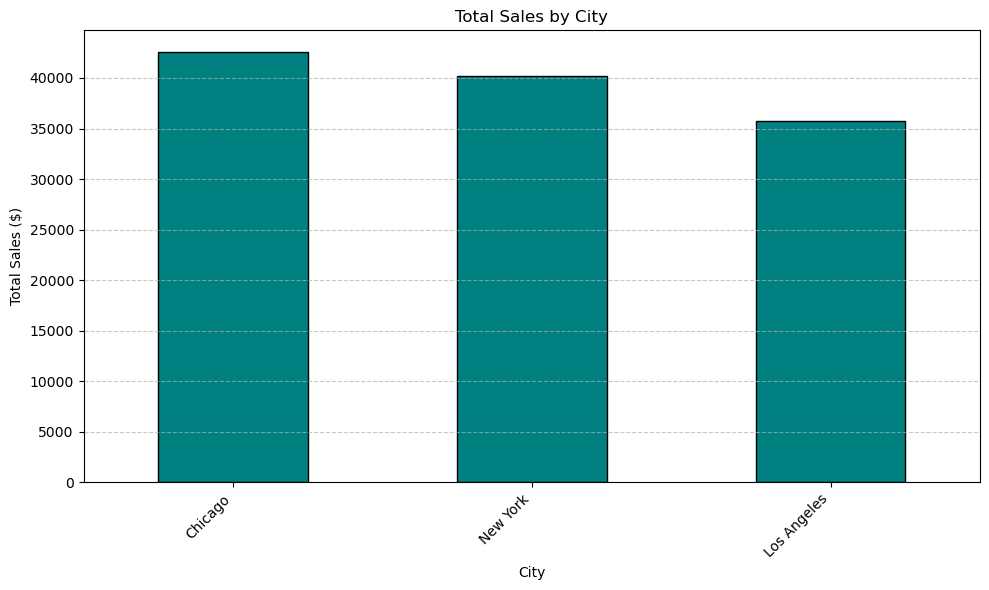

In [11]:
# Group by city and calculate total sales
city_sales = dataset.groupby('city')['total_price'].sum()

# Sort the sales data for better visualization
city_sales = city_sales.sort_values(ascending=False)

# Display the total sales by city
print("Total Sales by City:")
print(city_sales)

# Plot a bar chart for city sales
plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar', color='teal', edgecolor='black')

# Add chart labels and title
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart
plt.tight_layout()
plt.show()

In [ ]:
LOW SALES CITY BEST sales PRODUCT

Top-Selling Item in Los Angeles:
              quantity  total_price
product_name                       
Orange Juice       853      8564.29

Low-Selling Item in Los Angeles:
              quantity  total_price
product_name                       
Apple              441      5525.06


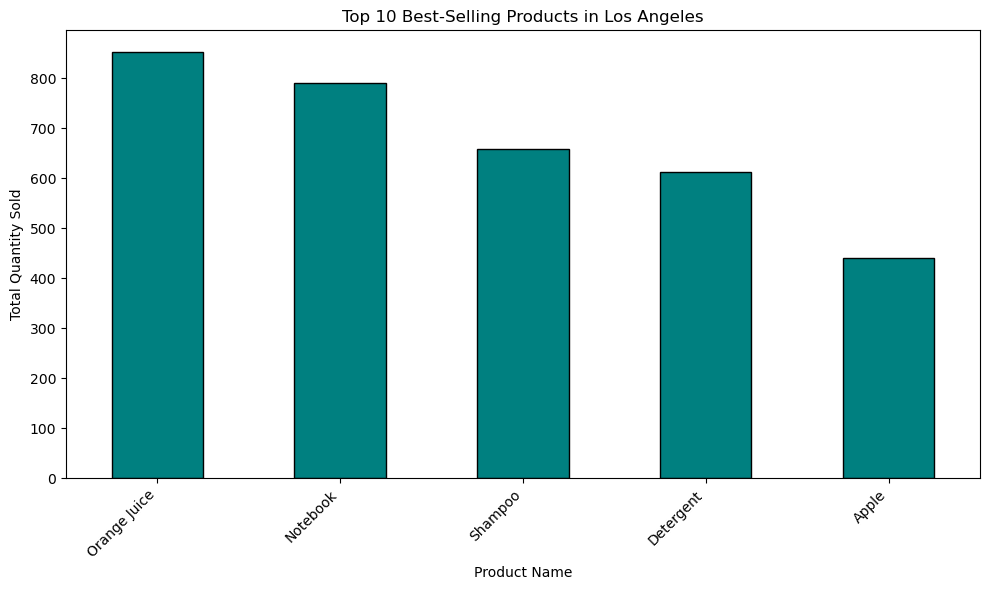

In [12]:

# Filter the dataset for sales in Los Angeles
la_sales = dataset[dataset['city'] == 'Los Angeles']

# Group by product_name and calculate the total quantity sold and total sales
la_product_stats = la_sales.groupby('product_name')[['quantity', 'total_price']].sum()

# Sort by total quantity sold to find top and low-selling items
top_selling_item = la_product_stats.sort_values(by='quantity', ascending=False).head(1)
low_selling_item = la_product_stats.sort_values(by='quantity', ascending=True).head(1)

# Display the results
print("Top-Selling Item in Los Angeles:")
print(top_selling_item)

print("\nLow-Selling Item in Los Angeles:")
print(low_selling_item)

# Optional: Display a bar chart for top 10 products
import matplotlib.pyplot as plt

# Sort by quantity and get the top 10 products
top_10_products = la_product_stats.sort_values(by='quantity', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_products['quantity'].plot(kind='bar', color='teal', edgecolor='black')

# Add labels and title
plt.title('Top 10 Best-Selling Products in Los Angeles')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
REWARDS POINT

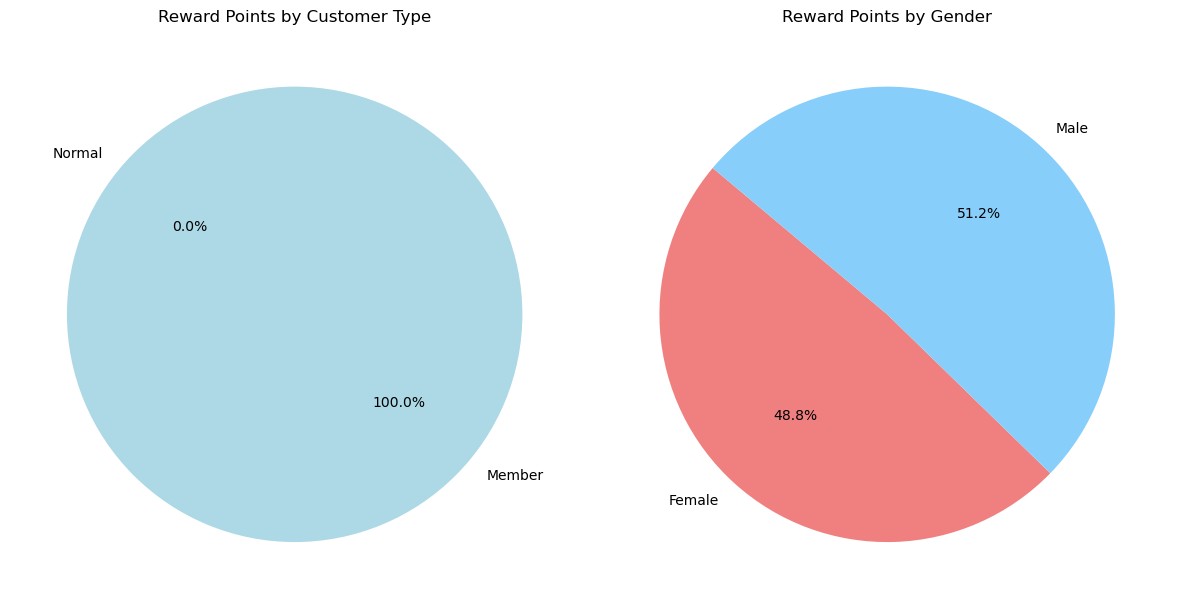

In [14]:
# Group data by 'customer_type' and calculate total reward points
customer_type_rewards = dataset.groupby('customer_type')['reward_points'].sum()

# Group data by 'gender' and calculate total reward points
gender_rewards = dataset.groupby('gender')['reward_points'].sum()

# Plot Pie Chart for Customer Type
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot 1 for customer type
plt.pie(customer_type_rewards, labels=customer_type_rewards.index, autopct='%1.1f%%', 
        startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Reward Points by Customer Type')

# Plot Pie Chart for Gender
plt.subplot(1, 2, 2)  # Subplot 2 for gender
plt.pie(gender_rewards, labels=gender_rewards.index, autopct='%1.1f%%', 
        startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Reward Points by Gender')

# Show the plots
plt.tight_layout()
plt.show()

conclusions:

* Los Angeles has low membership numbers, so the membership discounts should be higher in this city to encourage more people to sign up for membership.
* Advice to Increase Sales of Low-Performing Categories:
  Beverages:
  
         #Introduce promotional offers like "Buy One Get One Free" or discounts on bulk purchases.
          #Expand variety by introducing trending beverage options (e.g., organic drinks, energy drinks).
           #Partner with local events or venues to promote beverage sales.

Household Items:

               #household items together at a discounted price (e.g., cleaning supplies bundles).
                 #Run campaigns targeting specific seasons (e.g., spring cleaning discounts).
                    #Highlight product utility through social media or in-store demonstrations.

Stationery:

                 #Target students and office workers with back-to-school or office-supply promotions.
                      #Offer loyalty rewards for repeat purchases of stationery.
                           #Collaborate with schools or educational institutions for bulk sales.
* Focus on Apple:
  
              #Implement promotional campaigns (e.g., discounts or combo deals) to boost sales.
                  #Highlight health benefits through marketing to appeal to health-conscious consumers.
                           #Consider introducing seasonal offers to increase demand.
Enhance Detergent Sales:

                #Bundle detergent with other household cleaning products at a discounted price.
                         #Use targeted advertising to promote the detergent's features and benefits.
                                 #Offer larger-sized packages at a competitive price to attract bulk buyers.
Maintain Strong Performers:

                        #Shampoo, Notebook, and Orange Juice are top performers. Continue to maintain inventory levels, ensure competitive pricing, and explore cross-selling opportunities to sustain sales momentum.
* Recommendations to Increase Female Customers:

  
                    #Develop campaigns that specifically target women’s interests and preferences.
                                #Focus on platforms where women have a higher engagement rate (e.g., Instagram, Pinterest, and Facebook).
                                    #Incrise female iteam like mackup,dress ect.
                                      #Enhance customer service to cater to women's needs, including personalized recommendations.
*By promoting Orange Juice through targeted campaigns and increasing the visibility of Apple with strategic discounts and bundles, you can increase sales in Los Angeles and capitalize on the current trends. Creating localized, engaging marketing strategies and offering value-added promotions will also contribute to sustained growth in this market.
